<a href="https://colab.research.google.com/github/areejimran86/Model-Evaluation/blob/main/model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


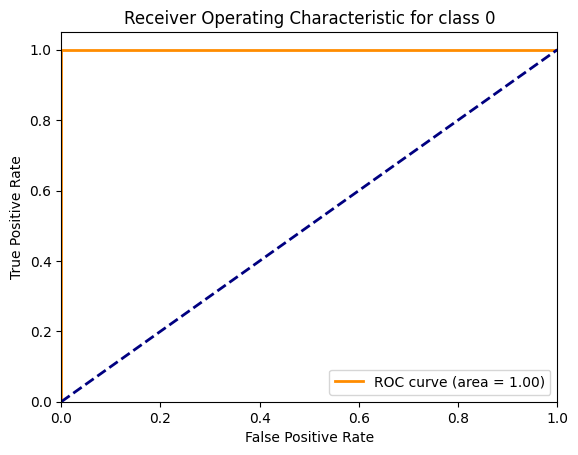

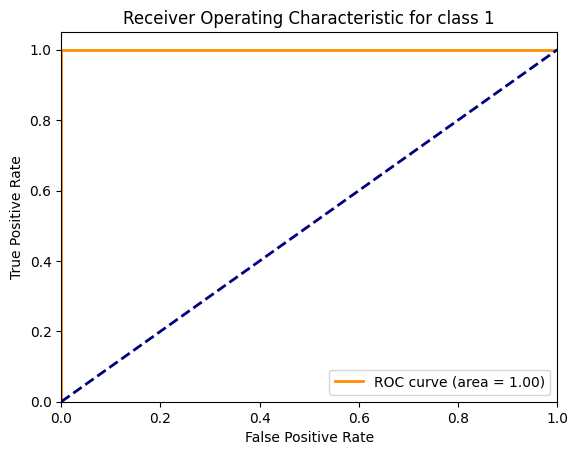

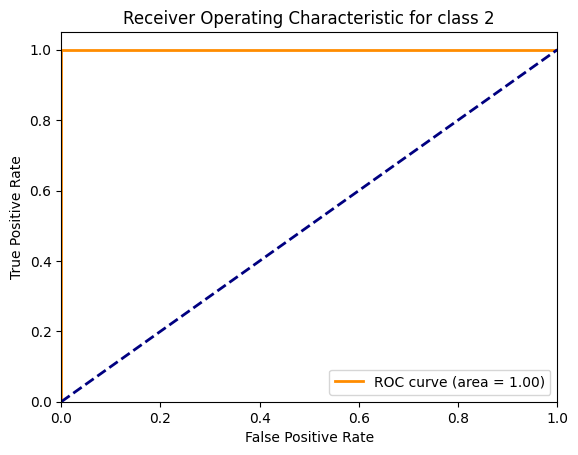


Cross-Validation Accuracy: 0.9733
Standard Deviation of Cross-Validation Accuracy: 0.0249


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the calculated metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# Create and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)

# Plot the ROC curve and calculate the AUC for each class
# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
for i in range(3):
    plt.figure()
    plt.plot(fpr[i], tpr[i], color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for class {i}')
    plt.legend(loc="lower right")
    plt.show()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)

# Calculate mean and standard deviation of cross-validation accuracy
mean_cv_accuracy = cv_scores.mean()
std_cv_accuracy = cv_scores.std()

# Print cross-validation results
print(f'\nCross-Validation Accuracy: {mean_cv_accuracy:.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {std_cv_accuracy:.4f}')
